In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler

In [2]:
# Show all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import the Dataset

In [3]:
# Read the CSV file into a DataFrame
mbti_data = pd.read_csv('./datasets/Myers Briggs Table_S1.csv')
mbti_data.head()


,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [4]:
mbti_data.describe(include="all")

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
count,97.000000,97.000000,97.000000,97.00000,97,97,97.000000,97.000000,97.000000,97.000000,97,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97
unique,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,Female,Low,NaN,NaN,NaN,NaN,ESFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
freq,NaN,NaN,NaN,NaN,49,74,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
mean,49.000000,43.855670,65.731959,159.43299,NaN,NaN,2.139175,3.747423,1.943299,2.530928,NaN,12.690722,8.288660,15.134021,11.041237,10.505155,13.443299,10.319588,11.680412,NaN
std,28.145456,16.776093,3.737522,36.19591,NaN,NaN,2.572635,3.191071,2.587909,3.111483,NaN,5.717956,5.697146,4.833970,4.732242,5.332924,5.297344,5.727395,5.711003,NaN
min,1.000000,11.000000,58.000000,68.00000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,0.000000,5.000000,1.000000,0.000000,2.000000,0.000000,2.000000,NaN
25%,25.000000,30.000000,63.000000,135.00000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,8.000000,3.000000,12.000000,7.000000,6.000000,10.000000,5.000000,6.000000,NaN
50%,49.000000,45.000000,66.000000,157.00000,NaN,NaN,1.000000,3.000000,0.500000,0.000000,NaN,13.000000,8.000000,15.000000,11.000000,11.000000,13.000000,11.000000,11.000000,NaN
75%,73.000000,56.000000,68.000000,183.00000,NaN,NaN,4.000000,7.000000,3.500000,5.000000,NaN,18.000000,13.000000,19.000000,14.000000,14.000000,18.000000,16.000000,17.000000,NaN


In [5]:
mbti_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S No            97 non-null     int64  
 1   AGE             97 non-null     int64  
 2   HEIGHT          97 non-null     int64  
 3   WEIGHT          97 non-null     int64  
 4   SEX             97 non-null     object 
 5   ACTIVITY LEVEL  97 non-null     object 
 6   PAIN 1          97 non-null     float64
 7   PAIN 2          97 non-null     float64
 8   PAIN 3          97 non-null     float64
 9   PAIN 4          97 non-null     float64
 10  MBTI            97 non-null     object 
 11  E               97 non-null     int64  
 12  I               97 non-null     int64  
 13  S               97 non-null     int64  
 14  N               97 non-null     int64  
 15  T               97 non-null     int64  
 16  F               97 non-null     int64  
 17  J               97 non-null     int64

## Data Cleaning

In [6]:
# Remove all spaces from Variable Names
mbti_data.columns = mbti_data.columns.str.replace(" ","_", regex=True)

mbti_data

,S_No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY_LEVEL,PAIN_1,PAIN_2,PAIN_3,PAIN_4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A
5,6,68,74,182,Male,Low,0.0,2.5,1.5,0.0,ISFP,4,17,17,9,11,13,4,18,D
6,7,62,68,263,Male,Low,7.0,10.0,10.0,10.0,ISTP,7,14,20,6,14,10,9,13,B
7,8,65,61,143,Female,Low,0.0,9.0,5.0,10.0,ESTJ,17,4,17,9,19,5,17,5,D
8,9,66,67,180,Male,Low,0.5,3.5,0.5,9.5,ESFJ,19,2,18,8,11,13,13,9,C
9,10,58,69,165,Male,Low,0.0,7.5,7.0,3.0,INFJ,5,16,13,13,11,13,17,5,D


## Check for null values

In [7]:
mbti_df = mbti_data.copy()
# Cleaning the data (check for null values)
mbti_df.isnull().sum()
# We need to check the null values and need to think should we drop it or replace it with some values.

S_No              0
AGE               0
HEIGHT            0
WEIGHT            0
SEX               0
ACTIVITY_LEVEL    0
PAIN_1            0
PAIN_2            0
PAIN_3            0
PAIN_4            0
MBTI              0
E                 0
I                 0
S                 0
N                 0
T                 0
F                 0
J                 0
P                 0
POSTURE           0
dtype: int64

## Drop columns that are not needed

In [8]:
# Drop "S_No" column as not needed
mbti_df = mbti_df.drop(columns=['S_No'])
mbti_df

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY_LEVEL,PAIN_1,PAIN_2,PAIN_3,PAIN_4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A
5,68,74,182,Male,Low,0.0,2.5,1.5,0.0,ISFP,4,17,17,9,11,13,4,18,D
6,62,68,263,Male,Low,7.0,10.0,10.0,10.0,ISTP,7,14,20,6,14,10,9,13,B
7,65,61,143,Female,Low,0.0,9.0,5.0,10.0,ESTJ,17,4,17,9,19,5,17,5,D
8,66,67,180,Male,Low,0.5,3.5,0.5,9.5,ESFJ,19,2,18,8,11,13,13,9,C
9,58,69,165,Male,Low,0.0,7.5,7.0,3.0,INFJ,5,16,13,13,11,13,17,5,D


## Change catergorical variables to numerical variables

### Since "ACTIVITY_LEVEL" is a catergorical variable with no ordinal relationship, use label encoding


In [9]:
# Define mapping for label encoding
label_mapping = {'Low': 1, 'Moderate': 2, 'High': 3}

# Apply label encoding inplace to 'activity_level' column
mbti_df['ACTIVITY_LEVEL'].replace(label_mapping, inplace=True)

mbti_df

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY_LEVEL,PAIN_1,PAIN_2,PAIN_3,PAIN_4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,53,62,125,Female,1,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,52,69,157,Male,3,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,30,69,200,Male,3,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,51,66,175,Male,2,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,45,63,199,Female,2,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A
5,68,74,182,Male,1,0.0,2.5,1.5,0.0,ISFP,4,17,17,9,11,13,4,18,D
6,62,68,263,Male,1,7.0,10.0,10.0,10.0,ISTP,7,14,20,6,14,10,9,13,B
7,65,61,143,Female,1,0.0,9.0,5.0,10.0,ESTJ,17,4,17,9,19,5,17,5,D
8,66,67,180,Male,1,0.5,3.5,0.5,9.5,ESFJ,19,2,18,8,11,13,13,9,C
9,58,69,165,Male,1,0.0,7.5,7.0,3.0,INFJ,5,16,13,13,11,13,17,5,D


### Since "POSTURE" is a catergorical variable with no ordinal relationship, use one-hot encoding

In [10]:
# Perform one-hot encoding inplace
df_encoded = pd.get_dummies(mbti_df['POSTURE'], prefix='POSTURE', dtype=int)

# Concatenate the original DataFrame with the encoded columns
mbti_df[df_encoded.columns] = df_encoded

# Drop the original 'Posture' column
mbti_df.drop(columns=['POSTURE'], inplace=True)
mbti_df

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY_LEVEL,PAIN_1,PAIN_2,PAIN_3,PAIN_4,MBTI,E,I,S,N,T,F,J,P,POSTURE_A,POSTURE_B,POSTURE_C,POSTURE_D
0,53,62,125,Female,1,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,1,0,0,0
1,52,69,157,Male,3,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,0,1,0,0
2,30,69,200,Male,3,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,1,0,0,0
3,51,66,175,Male,2,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,0,0,0,1
4,45,63,199,Female,2,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,1,0,0,0
5,68,74,182,Male,1,0.0,2.5,1.5,0.0,ISFP,4,17,17,9,11,13,4,18,0,0,0,1
6,62,68,263,Male,1,7.0,10.0,10.0,10.0,ISTP,7,14,20,6,14,10,9,13,0,1,0,0
7,65,61,143,Female,1,0.0,9.0,5.0,10.0,ESTJ,17,4,17,9,19,5,17,5,0,0,0,1
8,66,67,180,Male,1,0.5,3.5,0.5,9.5,ESFJ,19,2,18,8,11,13,13,9,0,0,1,0
9,58,69,165,Male,1,0.0,7.5,7.0,3.0,INFJ,5,16,13,13,11,13,17,5,0,0,0,1


In [11]:
# Check for size before removing duplicates
mbti_df.shape

(97, 22)

## Find duplicated rows

In [12]:
# Check for duplicate rows
duplicated_rows = mbti_df.duplicated(subset=list(mbti_df.columns))

# Extract duplicated rows
duplicated_rows_df = mbti_df[duplicated_rows]

# Print out duplicated rows
if not duplicated_rows_df.empty:
    print("Duplicated Rows:")
    print(duplicated_rows_df)
else:
    print("No duplicated rows found.")

Duplicated Rows:
    AGE  HEIGHT  WEIGHT     SEX  ACTIVITY_LEVEL  PAIN_1  PAIN_2  PAIN_3  \
95   28      67     180  Female               1     0.0     0.0     0.0   

    PAIN_4  MBTI   E   I   S   N  T   F   J  P  POSTURE_A  POSTURE_B  \
95     0.0  ESFJ  11  10  22  14  8  16  14  8          0          1   

    POSTURE_C  POSTURE_D  
95          0          0  


## Remove duplicates

In [13]:
# Remove duplicate rows based on all columns
mbti_df.drop_duplicates(inplace=True)

# Resetting the DataFrame index and drop old index
mbti_df = mbti_df.reset_index(drop=True)

# Print dataframe after removing duplicate rows
mbti_df

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY_LEVEL,PAIN_1,PAIN_2,PAIN_3,PAIN_4,MBTI,E,I,S,N,T,F,J,P,POSTURE_A,POSTURE_B,POSTURE_C,POSTURE_D
0,53,62,125,Female,1,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,1,0,0,0
1,52,69,157,Male,3,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,0,1,0,0
2,30,69,200,Male,3,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,1,0,0,0
3,51,66,175,Male,2,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,0,0,0,1
4,45,63,199,Female,2,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,1,0,0,0
5,68,74,182,Male,1,0.0,2.5,1.5,0.0,ISFP,4,17,17,9,11,13,4,18,0,0,0,1
6,62,68,263,Male,1,7.0,10.0,10.0,10.0,ISTP,7,14,20,6,14,10,9,13,0,1,0,0
7,65,61,143,Female,1,0.0,9.0,5.0,10.0,ESTJ,17,4,17,9,19,5,17,5,0,0,0,1
8,66,67,180,Male,1,0.5,3.5,0.5,9.5,ESFJ,19,2,18,8,11,13,13,9,0,0,1,0
9,58,69,165,Male,1,0.0,7.5,7.0,3.0,INFJ,5,16,13,13,11,13,17,5,0,0,0,1


In [14]:
# Check for size ater removing duplicates
mbti_df.shape

(96, 22)

## Save the dataframe into a CSV file

In [15]:
# Save the dataframe to a CSV file
mbti_df.to_csv('./datasets/mbti_data.csv', index=False)

## Check for outliers

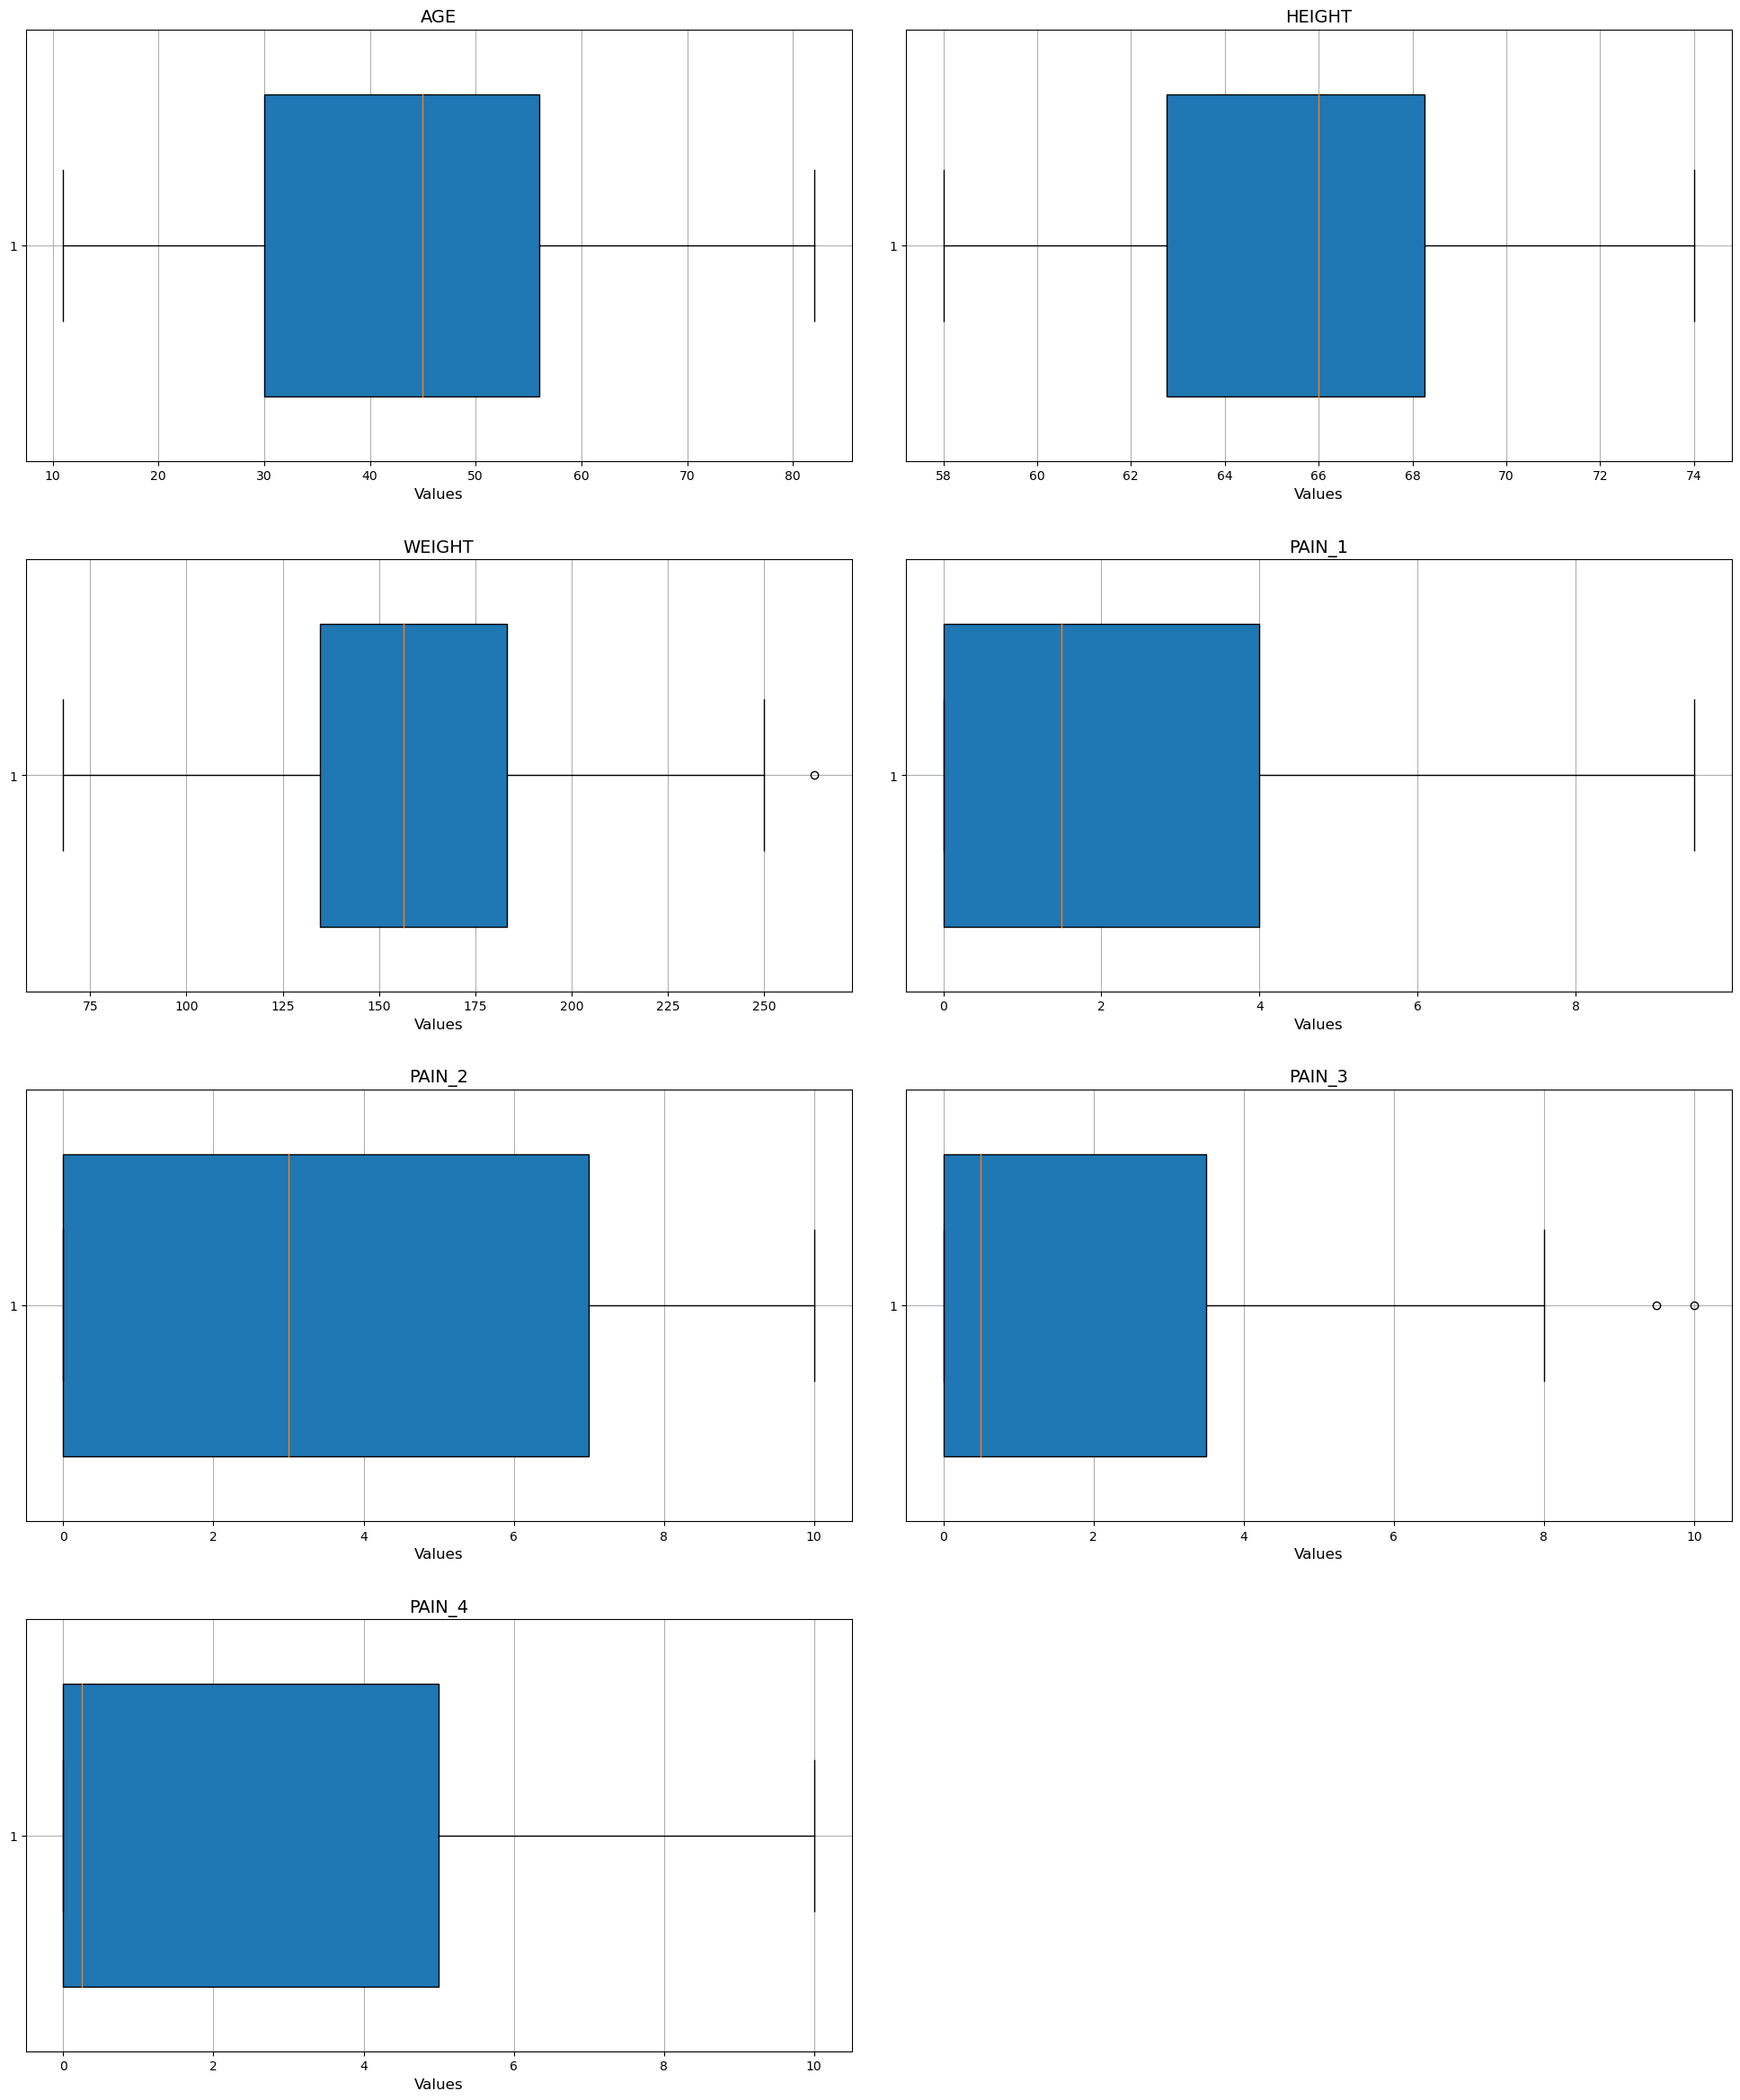

In [16]:
# Select numerical variables for outlier analysis
numerical_vars = ['AGE', 'HEIGHT', 'WEIGHT', 'PAIN_1', 'PAIN_2', 'PAIN_3', 'PAIN_4']
# numerical_vars = ['AGE', 'HEIGHT', 'WEIGHT']

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_vars)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10*num_cols, 6*num_rows))

# Flatten the axs array if it's more than 1D
axs = axs.flatten() if isinstance(axs, np.ndarray) else [axs]

# Iterate through numerical variables and create box plots
for i, var in enumerate(numerical_vars):
    ax = axs[i]
    ax.boxplot(mbti_df[var], vert=False, patch_artist=True, widths=0.7)
    ax.set_title(var, fontsize=14)  # Increase title font size
    ax.set_xlabel('Values', fontsize=12)  # Label for x-axis
    ax.grid(True)

# Hide extra subplots if there are more than needed
for j in range(num_plots, len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout(pad=3.0)  # Adjust spacing between each subplots
plt.show()


## Calculate outliers and drop outlier row

In [17]:
# Identify and drop outliers
cleaned_mbti_df = mbti_df.copy()  # Create a copy of the original DataFrame
outlier_indices = []
for var in numerical_vars:
    q1 = mbti_df[var].quantile(0.25)
    q3 = mbti_df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = mbti_df[((mbti_df[var] < lower_bound) | (mbti_df[var] > upper_bound))]
    outlier_indices.extend(outliers.index)

#print(outlier_indices)

# Remove duplicate indices and create a new DataFrame without outliers
cleaned_mbti_df = mbti_df.drop(index=set(outlier_indices))

# Reset the DataFrame index
cleaned_mbti_df.reset_index(drop=True, inplace=True)
cleaned_mbti_df

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY_LEVEL,PAIN_1,PAIN_2,PAIN_3,PAIN_4,MBTI,E,I,S,N,T,F,J,P,POSTURE_A,POSTURE_B,POSTURE_C,POSTURE_D
0,53,62,125,Female,1,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,1,0,0,0
1,52,69,157,Male,3,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,0,1,0,0
2,30,69,200,Male,3,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,1,0,0,0
3,45,63,199,Female,2,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,1,0,0,0
4,68,74,182,Male,1,0.0,2.5,1.5,0.0,ISFP,4,17,17,9,11,13,4,18,0,0,0,1
5,65,61,143,Female,1,0.0,9.0,5.0,10.0,ESTJ,17,4,17,9,19,5,17,5,0,0,0,1
6,66,67,180,Male,1,0.5,3.5,0.5,9.5,ESFJ,19,2,18,8,11,13,13,9,0,0,1,0
7,58,69,165,Male,1,0.0,7.5,7.0,3.0,INFJ,5,16,13,13,11,13,17,5,0,0,0,1
8,61,67,210,Male,1,5.0,0.0,0.0,9.0,ENTP,11,10,6,20,16,8,10,12,0,1,0,0
9,33,62,120,Female,1,0.0,3.0,0.0,0.0,ISFJ,2,19,22,4,9,15,12,10,0,1,0,0


## Save the dataframe (without outliers) into a CSV file

In [18]:
# Save the dataframe to a CSV file
cleaned_mbti_df.to_csv('./datasets/mbti_data_without_outliers.csv', index=False)

In [19]:
# Standardizing Data
# Select numerical variables for standardization
numerical_vars = ['AGE', 'HEIGHT', 'WEIGHT', 'PAIN_1', 'PAIN_2', 'PAIN_3', 'PAIN_4']

# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected variables
mbti_df_standardized = cleaned_mbti_df.copy()  # Make a copy to avoid modifying the original DataFrame
mbti_df_standardized[numerical_vars] = scaler.fit_transform(mbti_df_standardized[numerical_vars])

# Now mbti_df_standardized contains standardized numerical variables
mbti_df_standardized

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY_LEVEL,PAIN_1,PAIN_2,PAIN_3,PAIN_4,MBTI,E,I,S,N,T,F,J,P,POSTURE_A,POSTURE_B,POSTURE_C,POSTURE_D
0,0.551791,-0.979894,-0.945349,Female,1,-0.838567,-1.188917,-0.767984,-0.820154,ESFJ,18,3,17,9,9,13,18,4,1,0,0,0
1,0.492103,0.878233,-0.027167,Male,3,2.050317,1.410111,1.367829,0.168237,ISTJ,6,15,14,12,21,3,13,9,0,1,0,0
2,-0.821019,0.878233,1.206640,Male,3,-0.838567,-1.188917,-0.767984,-0.820154,ESTJ,15,6,16,10,15,9,12,10,1,0,0,0
3,0.074292,-0.714447,1.177947,Female,2,0.812224,0.435475,0.086341,-0.161227,ENFJ,14,7,20,6,9,15,16,6,1,0,0,0
4,1.447101,2.205467,0.690163,Male,1,-0.838567,-0.376721,-0.127240,-0.820154,ISFP,4,17,17,9,11,13,4,18,0,0,0,1
5,1.268039,-1.245340,-0.428872,Female,1,-0.838567,1.734990,1.367829,2.474483,ESTJ,17,4,17,9,19,5,17,5,0,0,0,1
6,1.327726,0.347340,0.632777,Male,1,-0.632218,-0.051842,-0.554402,2.309751,ESFJ,19,2,18,8,11,13,13,9,0,0,1,0
7,0.850227,0.878233,0.202379,Male,1,-0.838567,1.247672,2.222153,0.168237,INFJ,5,16,13,13,11,13,17,5,0,0,0,1
8,1.029289,0.347340,1.493572,Male,1,1.224922,-1.188917,-0.767984,2.145019,ENTP,11,10,6,20,16,8,10,12,0,1,0,0
9,-0.641957,-0.979894,-1.088815,Female,1,-0.838567,-0.214282,-0.767984,-0.820154,ISFJ,2,19,22,4,9,15,12,10,0,1,0,0


## Plot data without the outliers

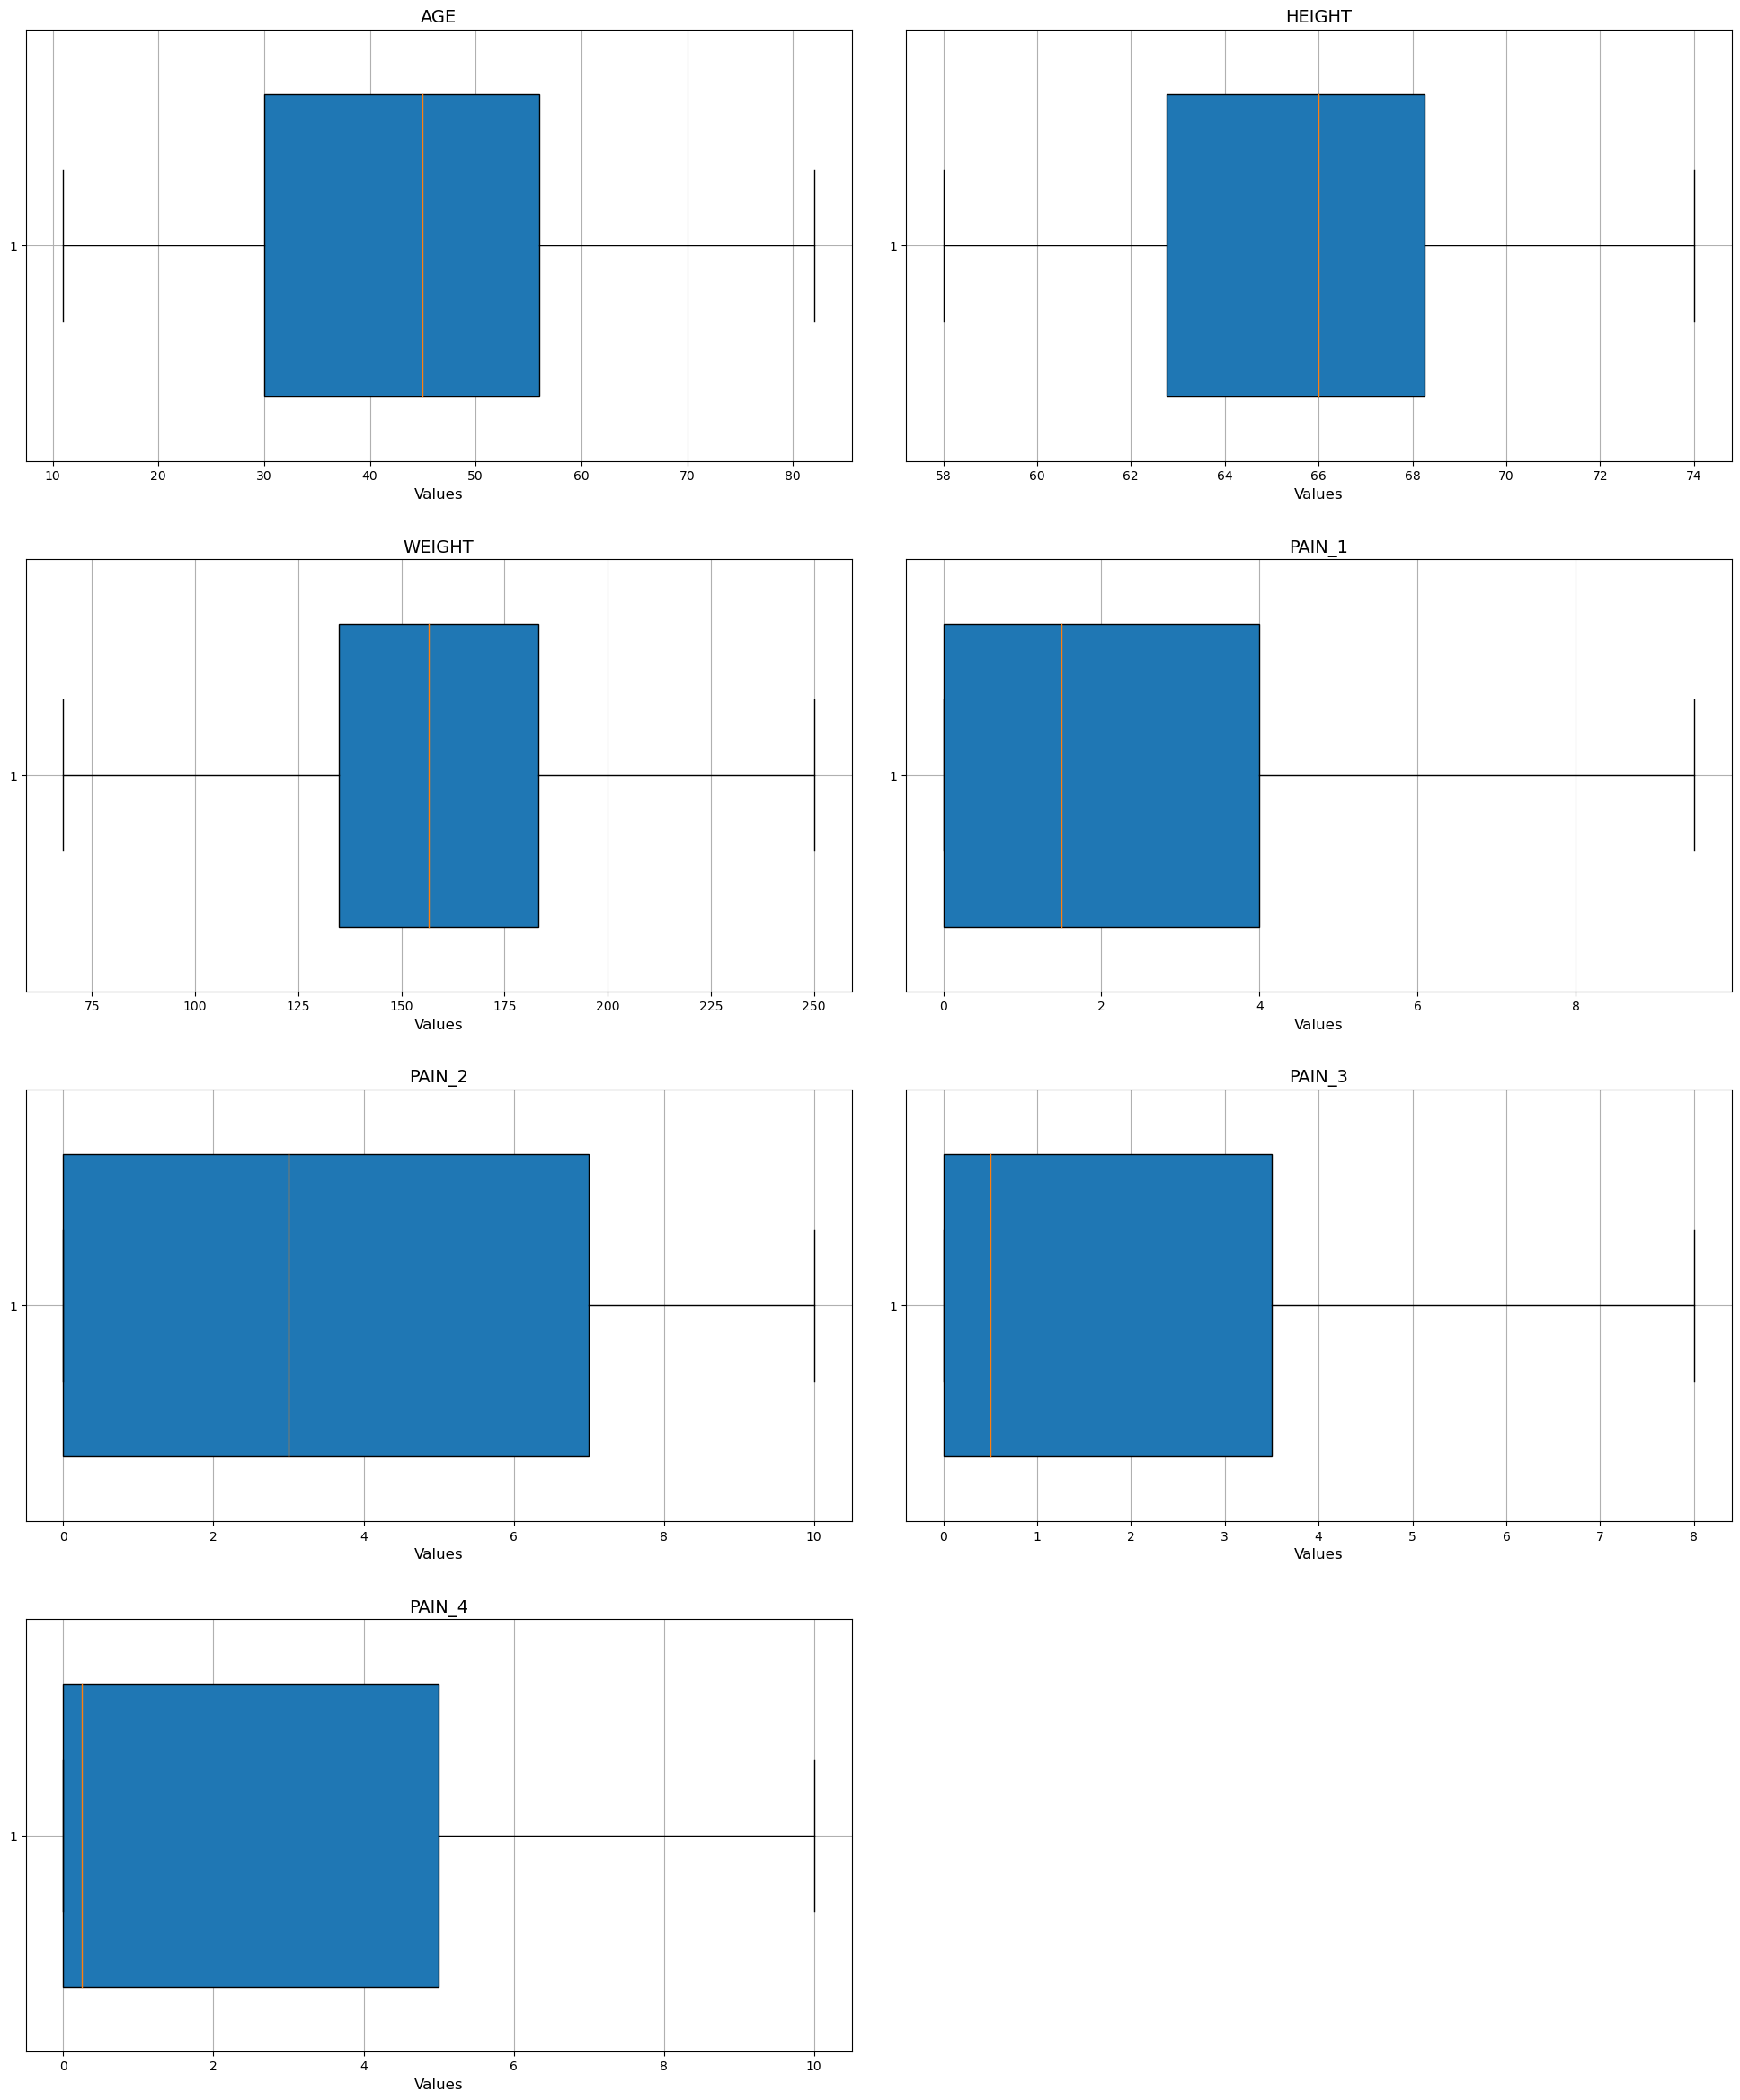

In [20]:
df_exclude_outlier = mbti_df.copy()
# Select numerical variables for outlier analysis
numerical_vars = ['AGE', 'HEIGHT', 'WEIGHT', 'PAIN_1', 'PAIN_2', 'PAIN_3', 'PAIN_4']

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_vars)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10*num_cols, 6*num_rows))

# Flatten the axs array if it's more than 1D
axs = axs.flatten() if isinstance(axs, np.ndarray) else [axs]

# Iterate through numerical variables and create box plots
for i, var in enumerate(numerical_vars):
    ax = axs[i]
    # Set showfliers=False to exclude outliers from whiskers
    ax.boxplot(df_exclude_outlier[var], vert=False, patch_artist=True, widths=0.7, showfliers=False)  
    ax.set_title(var, fontsize=14)  # Increase title font size
    ax.set_xlabel('Values', fontsize=12)  # Label for x-axis
    ax.grid(True)

# Hide extra subplots if there are more than needed
for j in range(num_plots, len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout(pad=3.0)  # Adjust spacing between each subplot
plt.show()